<a href="https://colab.research.google.com/github/ArchitMathur14/SNAKEGAME/blob/main/editedit_of_am12_bb20_rj43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
from datetime import datetime

In [3]:
#Loading the dataset
df_am12_bb20_rj43 = pd.read_csv('game_info.csv')

/tmp/ipython-input-3333707503.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_am12_bb20_rj43 = pd.read_csv('game_info.csv')


In [4]:
print("Shape of dataset:", df_am12_bb20_rj43.shape)
print("Columns:", df_am12_bb20_rj43.columns.tolist())
print("\nFirst 5 rows:")
print(df_am12_bb20_rj43.head())

Shape of dataset: (336776, 27)
Columns: ['id', 'slug', 'name', 'metacritic', 'released', 'tba', 'updated', 'website', 'rating', 'rating_top', 'playtime', 'achievements_count', 'ratings_count', 'suggestions_count', 'game_series_count', 'reviews_count', 'platforms', 'developers', 'genres', 'publishers', 'esrb_rating', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing']

First 5 rows:
      id            slug                   name  metacritic    released  \
0      1  dgeneration-hd        D/Generation HD         NaN  2015-10-23   
1     10         g-prime  G Prime Into The Rain         NaN  2016-01-06   
2    100    land-sliders           Land Sliders         NaN  2015-09-24   
3   1000      pixel-gear             Pixel Gear         NaN  2016-10-20   
4  10000  gods-and-idols         Gods and Idols         NaN  2016-12-12   

     tba              updated  \
0  False  2019-09-17T11:58:57   
1  False  2019

In [5]:
df_am12_bb20_rj43_dropped = df_am12_bb20_rj43.drop(['slug', 'tba', 'updated', 'playtime', 'website', 'suggestions_count', 'game_series_count', 'achievements_count', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped','added_status_playing'], axis=1)
print("Shape of dataset after dropping columns:", df_am12_bb20_rj43_dropped.shape)

Shape of dataset after dropping columns: (336776, 13)


In [6]:
df_am12_bb20_rj43_dropped.head()

,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating
0,1,D/Generation HD,NaN,2015-10-23,0.0,0.0,2.0,4.0,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+
1,10,G Prime Into The Rain,NaN,2016-01-06,0.0,0.0,3.0,3.0,macOS||PC||Xbox One,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone
2,100,Land Sliders,NaN,2015-09-24,0.0,0.0,2.0,2.0,iOS,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+
3,1000,Pixel Gear,NaN,2016-10-20,0.0,0.0,0.0,0.0,PC||PlayStation 4,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen
4,10000,Gods and Idols,NaN,2016-12-12,0.0,1.0,5.0,5.0,PC,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN


In [7]:
# Check for null values in each column
null_counts = df_am12_bb20_rj43_dropped.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
id                    0
name                  2
metacritic       333205
released          19171
rating                1
rating_top            1
ratings_count         1
reviews_count         1
platforms          3397
developers         6143
genres            74168
publishers       241958
esrb_rating      298245
dtype: int64


In [8]:
# Drop rows with any null values
df_am12_bb20_rj43_cleaned = df_am12_bb20_rj43_dropped.dropna()

print("\nShape of dataset after dropping nulls:", df_am12_bb20_rj43_cleaned.shape)
df_am12_bb20_rj43_cleaned.head()



Shape of dataset after dropping nulls: (1685, 13)


,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating
85,10008,Sudden Strike 4,77.0,2017-08-10,3.12,4.0,32.0,33.0,macOS||iOS||Linux||PC||PlayStation 4,Kalypso Media||Kite Games,Action||Strategy,Kalypso Media||Kalypso,Mature
207,10020,Arizona Sunshine,81.0,2016-12-06,3.76,4.0,42.0,42.0,PC||PlayStation 4,Vertigo Games||Jaywalkers Interactive,Action||Adventure||Indie,Vertigo Games,Adults Only
359,10035,HITMAN,83.0,2017-11-16,3.92,4.0,1371.0,1375.0,Linux||macOS||PC||Xbox One||PlayStation 4,Feral Interactive||Square Enix||IO Interactive,Action||Shooter,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only
510,10049,Hitman: Codename 47,73.0,2000-11-19,3.87,4.0,367.0,367.0,PC,IO Interactive,Action||Shooter,Square Enix||Eidos Interactive,Mature
522,10050,Thief Gold,92.0,1998-11-29,4.13,5.0,173.0,173.0,PC,Looking Glass Studios,Action||Simulation,Square Enix,Mature


In [9]:
# 1. Create 'release_year' column
# Convert 'released' to datetime objects, coercing errors to NaT
df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')

# Extract the year, handle potential NaT values by filling with 0
df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)

# 2. Create 'game_age' column
# Assuming the current year is 2025 for calculating game age
df_am12_bb20_rj43_cleaned['game_age'] = 2025 - df_am12_bb20_rj43_cleaned['release_year']

# Handle cases where release_year was 0 (due to NaT in 'released')
df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['release_year'] == 0, 'game_age'] = np.nan

print("DataFrame with 'release_year' and 'game_age':")
display(df_am12_bb20_rj43_cleaned[['released', 'release_year', 'game_age']].head())

DataFrame with 'release_year' and 'game_age':


/tmp/ipython-input-4264186311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')
/tmp/ipython-input-4264186311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)
/tmp/ipython-input-4264186311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,released,release_year,game_age
85,2017-08-10,2017,8.0
207,2016-12-06,2016,9.0
359,2017-11-16,2017,8.0
510,2000-11-19,2000,25.0
522,1998-11-29,1998,27.0


In [10]:
# 3. Create 'metacritic_category' column
# Define bins and labels for metacritic scores
metacritic_bins = [0, 50, 80, 100]
metacritic_labels = ['low', 'medium', 'high']

df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)

print("\nDataFrame with 'metacritic_category':")
display(df_am12_bb20_rj43_cleaned[['metacritic', 'metacritic_category']].head())


DataFrame with 'metacritic_category':


/tmp/ipython-input-460707189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)


,metacritic,metacritic_category
85,77.0,medium
207,81.0,high
359,83.0,high
510,73.0,medium
522,92.0,high


In [11]:
# 4. Create 'ratings_category' column
# Define bins and labels for ratings (assuming rating is on a scale of 0-5)
ratings_bins = [0, 2, 4, 5.1] # Adding a small value to include 5.0
ratings_labels = ['low', 'medium', 'high']

df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)

print("\nDataFrame with 'ratings_category':")
display(df_am12_bb20_rj43_cleaned[['rating', 'ratings_category']].head())


DataFrame with 'ratings_category':


/tmp/ipython-input-1646889731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)


,rating,ratings_category
85,3.12,medium
207,3.76,medium
359,3.92,medium
510,3.87,medium
522,4.13,high


In [12]:
# 5. Create 'genre_count' column
# Split the 'genres' string by '||' and count the number of genres
df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()

# Create buckets for single and multiple genres
df_am12_bb20_rj43_cleaned['genre_count_category'] = df_am12_bb20_rj43_cleaned['genre_count'].apply(lambda x: 'single' if x == 1 else 'multiple')

print("\nDataFrame with 'genre_count' and 'genre_count_category':")
display(df_am12_bb20_rj43_cleaned[['genres', 'genre_count', 'genre_count_category']].head())


DataFrame with 'genre_count' and 'genre_count_category':


<>:3: SyntaxWarning: invalid escape sequence '\|'
<>:3: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipython-input-2635925446.py:3: SyntaxWarning: invalid escape sequence '\|'
  df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()
/tmp/ipython-input-2635925446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()
/tmp/ipython-input-2635925446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,genres,genre_count,genre_count_category
85,Action||Strategy,2,multiple
207,Action||Adventure||Indie,3,multiple
359,Action||Shooter,2,multiple
510,Action||Shooter,2,multiple
522,Action||Simulation,2,multiple


In [13]:
df_am12_bb20_rj43_cleaned.head()

,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating,release_year,game_age,metacritic_category,ratings_category,genre_count,genre_count_category
85,10008,Sudden Strike 4,77.0,2017-08-10,3.12,4.0,32.0,33.0,macOS||iOS||Linux||PC||PlayStation 4,Kalypso Media||Kite Games,Action||Strategy,Kalypso Media||Kalypso,Mature,2017,8.0,medium,medium,2,multiple
207,10020,Arizona Sunshine,81.0,2016-12-06,3.76,4.0,42.0,42.0,PC||PlayStation 4,Vertigo Games||Jaywalkers Interactive,Action||Adventure||Indie,Vertigo Games,Adults Only,2016,9.0,high,medium,3,multiple
359,10035,HITMAN,83.0,2017-11-16,3.92,4.0,1371.0,1375.0,Linux||macOS||PC||Xbox One||PlayStation 4,Feral Interactive||Square Enix||IO Interactive,Action||Shooter,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only,2017,8.0,high,medium,2,multiple
510,10049,Hitman: Codename 47,73.0,2000-11-19,3.87,4.0,367.0,367.0,PC,IO Interactive,Action||Shooter,Square Enix||Eidos Interactive,Mature,2000,25.0,medium,medium,2,multiple
522,10050,Thief Gold,92.0,1998-11-29,4.13,5.0,173.0,173.0,PC,Looking Glass Studios,Action||Simulation,Square Enix,Mature,1998,27.0,high,high,2,multiple


In [14]:
categorical_cols = df_am12_bb20_rj43_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_cols = df_am12_bb20_rj43_cleaned.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical variables:")
print(categorical_cols)

print("\nNon-categorical variables:")
print(non_categorical_cols)

Categorical variables:
['name', 'platforms', 'developers', 'genres', 'publishers', 'esrb_rating', 'metacritic_category', 'ratings_category', 'genre_count_category']

Non-categorical variables:
['id', 'metacritic', 'released', 'rating', 'rating_top', 'ratings_count', 'reviews_count', 'release_year', 'game_age', 'genre_count']


#Queries regarding dataframe

Query 1: Which is the most highly rated game of all time according to this file?

In [15]:
# Find the game with the highest metacritic score
df_am12_bb20_rj43_highest_metacritic_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['metacritic'].idxmax()]

print("Game with the highest Metacritic score:")
display(df_am12_bb20_rj43_highest_metacritic_game[['name', 'metacritic','release_year','publishers']])

# Find the game with the highest rating
df_am12_bb20_rj43_highest_rating_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['rating'].idxmax()]

print("\nGame with the highest rating:")
display(df_am12_bb20_rj43_highest_rating_game[['name', 'rating','release_year','publishers']])

Game with the highest Metacritic score:


,152424
name,The Legend of Zelda: Ocarina of Time
metacritic,99.0
release_year,1998
publishers,Nintendo



Game with the highest rating:


,240990
name,Persona 5 Royal
rating,4.81
release_year,2020
publishers,SEGA||Atlus


Query 2: List all games that the critics and audiences loved alike.

In [16]:
# Filter for games with high metacritic_category and high ratings_category
df_am12_bb20_rj43_loved_games = df_am12_bb20_rj43_cleaned[(df_am12_bb20_rj43_cleaned['metacritic_category'] == 'high') & (df_am12_bb20_rj43_cleaned['ratings_category'] == 'high')]

# Display the names of these games
print("Games loved by both critics and audiences:")
display(df_am12_bb20_rj43_loved_games[['name','metacritic','rating']])

Games loved by both critics and audiences:


,name,metacritic,rating
522,Thief Gold,92.0,4.13
668,Assassin’s Creed Brotherhood,88.0,4.21
678,Cities: Skylines,85.0,4.15
1041,Transistor,83.0,4.18
1477,NieR:Automata,86.0,4.34
...,...,...,...
332814,Dying Light: The Following,81.0,4.00
334819,Rayman Origins,86.0,4.12
335860,51 Worldwide Classics,82.0,4.09
336381,Xenoblade Chronicles 2,83.0,4.31


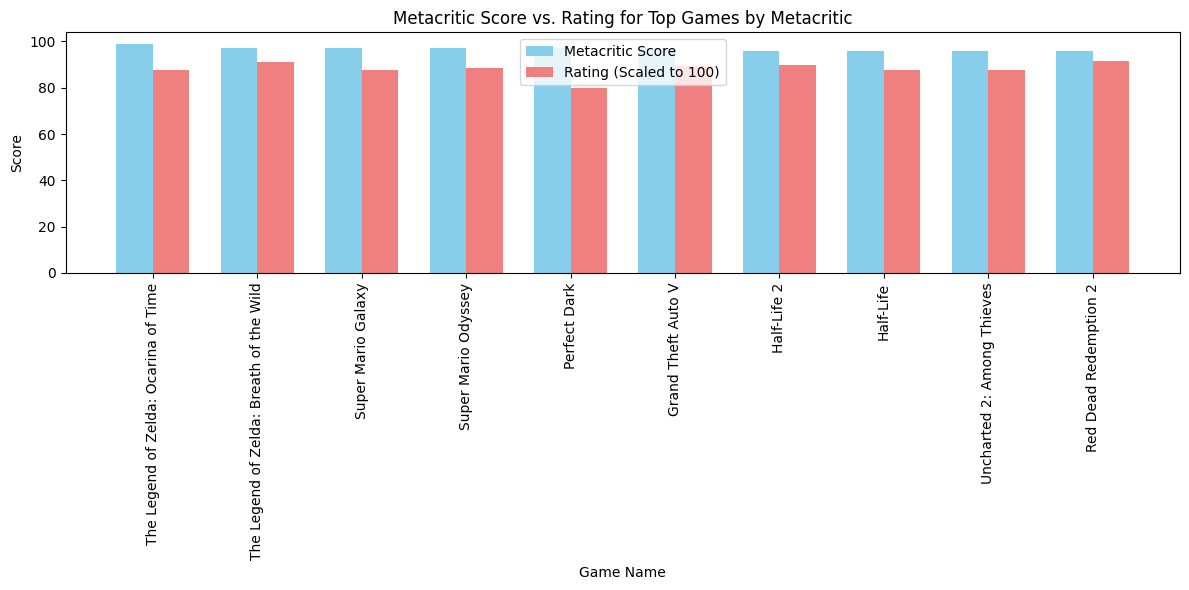

In [17]:
# Select a subset of games for visualization (e.g., top 10 by metacritic score)
top_games_metacritic = df_am12_bb20_rj43_cleaned.nlargest(10, 'metacritic')

# Create a bar graph comparing metacritic and rating
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(top_games_metacritic))

bar1 = ax.bar(index, top_games_metacritic['metacritic'], bar_width, label='Metacritic Score', color='skyblue')
bar2 = ax.bar(index + bar_width, top_games_metacritic['rating'] * 20, bar_width, label='Rating (Scaled to 100)', color='lightcoral') # Scale rating to compare with metacritic

ax.set_xlabel('Game Name')
ax.set_ylabel('Score')
ax.set_title('Metacritic Score vs. Rating for Top Games by Metacritic')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_games_metacritic['name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Query 3: Publishers with the highest number of games published over the years.

In [18]:
# Count the number of games per publisher
df_am12_bb20_rj43_publisher_counts = df_am12_bb20_rj43_cleaned['publishers'].value_counts()

# Display the top publishers
print("Publishers with the highest number of games published:")
display(df_am12_bb20_rj43_publisher_counts.head(10)) # Displaying the top 10 publishers

Publishers with the highest number of games published:


,count
publishers,
Electronic Arts,94
Ubisoft Entertainment,77
Nintendo,67
Activision Blizzard,52
SEGA,37
Square Enix,36
Microsoft Studios,36
Capcom,31
Bethesda Softworks,31


/tmp/ipython-input-2532153937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


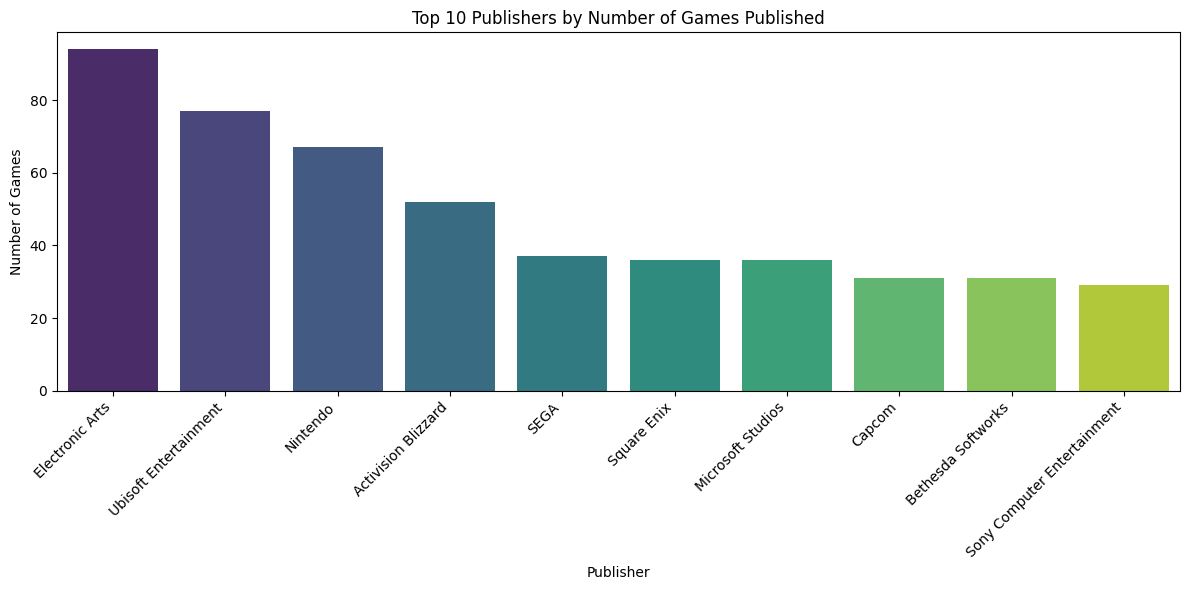

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N publishers (e.g., top 10)
top_n = 10
top_publishers = df_am12_bb20_rj43_publisher_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title(f'Top {top_n} Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Query 4: Number of games published every year.

Number of games published every year:


,count
release_year,
1980,1
1992,2
1993,1
1994,1
1995,1
1996,3
1997,4
1998,7
1999,10


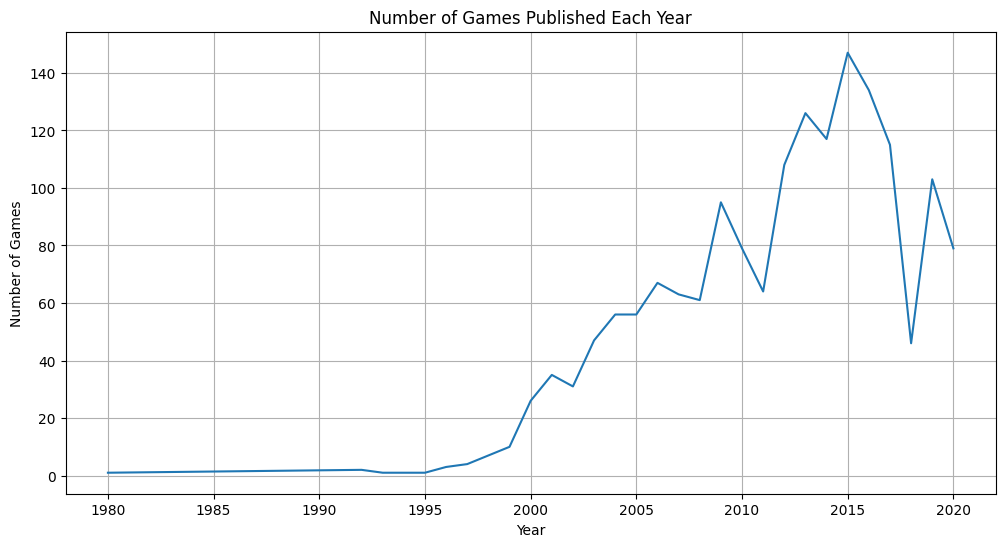

In [20]:
# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

# Display the count of games published each year
print("Number of games published every year:")
display(games_per_year)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Number of Games Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

Query 5: Average Metacritic and Audience ratings over the years

In [26]:
import streamlit as st
import pandas as pd
import plotly.express as px
import numpy as np

# A function to generate placeholder data since the original data is not available.
# This simulates the df_am12_bb20_rj43_cleaned DataFrame.
def generate_placeholder_data():
    np.random.seed(0)
    data = {
        'release_year': np.random.randint(1990, 2025, 200),
        'name': [f'Game_{i}' for i in range(200)],
        'metacritic': np.random.randint(60, 100, 200),
        'rating': np.random.uniform(3.0, 5.0, 200)
    }
    df = pd.DataFrame(data)
    # Introduce some 0 values to simulate the error from the original code
    df.loc[np.random.choice(df.index, 5), 'release_year'] = 0
    return df

# Load the data.
# Note: In a real-world scenario, you would replace this with pd.read_csv('your_data_file.csv')
df_am12_bb20_rj43_cleaned = generate_placeholder_data()


st.title('Game Publication Trends')
st.markdown("### Number of Games Published Each Year")

# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

# Display the count of games published each year
st.write("Number of games published every year:")
st.dataframe(games_per_year, use_container_width=True)

# Create an interactive line plot using Plotly Express
fig = px.line(
    x=games_per_year.index,
    y=games_per_year.values,
    title='Number of Games Published Each Year',
    labels={'x': 'Year', 'y': 'Number of Games'}
)

# Customize the plot
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Games',
    title_x=0.5,
    hovermode='x unified'
)

st.plotly_chart(fig, use_container_width=True)

2025-09-21 13:46:13.859 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.056 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-21 13:46:14.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 13:46:14.068 Thread 'MainThread': mi

DeltaGenerator()

In [29]:
!wget -q -O - ipv4.icanhazip.com

34.125.212.28


In [28]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.212.28:8501

⠙⠹⠸⠼⠴your url is: https://real-webs-admire.loca.lt
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  128 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:669 in code_to_exec                                                               
                                                                                        
  /content/app.py:4 in <module>                                                         
                                                   

In [31]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

st.set_page_config(layout="wide")

st.title('Game Publication Analysis')

# --- Data Loading and Preprocessing ---
# Loading the dataset
# Assuming 'game_info.csv' is available in the same directory as the app.py file
try:
    df_am12_bb20_rj43 = pd.read_csv('game_info.csv')
except FileNotFoundError:
    st.error("Error: 'game_info.csv' not found. Please make sure the file is in the same directory.")
    st.stop()

# Handle the DtypeWarning by specifying dtype for problematic column(s) if known,
# or by using low_memory=False (already used in previous execution)
# For simplicity here, we'll proceed with the loaded data assuming it's handled.

# Drop specified columns
df_am12_bb20_rj43_dropped = df_am12_bb20_rj43.drop([
    'slug', 'tba', 'updated', 'playtime', 'website', 'suggestions_count',
    'game_series_count', 'achievements_count', 'added_status_yet',
    'added_status_owned', 'added_status_beaten', 'added_status_toplay',
    'added_status_dropped','added_status_playing'
], axis=1)

# Drop rows with any null values after dropping columns
df_am12_bb20_rj43_cleaned = df_am12_bb20_rj43_dropped.dropna().copy() # Use .copy() to avoid SettingWithCopyWarning

# --- Feature Engineering ---
# 1. Create 'release_year' column
df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')
df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)

# 2. Create 'game_age' column
df_am12_bb20_rj43_cleaned['game_age'] = 2025 - df_am12_bb20_rj43_cleaned['release_year']
df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['release_year'] == 0, 'game_age'] = np.nan

# 3. Create 'metacritic_category' column
metacritic_bins = [0, 50, 80, 100]
metacritic_labels = ['low', 'medium', 'high']
df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)

# 4. Create 'ratings_category' column
ratings_bins = [0, 2, 4, 5.1]
ratings_labels = ['low', 'medium', 'high']
df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)

# 5. Create 'genre_count' and 'genre_count_category' columns
df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()
df_am12_bb20_rj43_cleaned['genre_count_category'] = df_am12_bb20_rj43_cleaned['genre_count'].apply(lambda x: 'single' if x == 1 else 'multiple')


# --- Query 1: Most Highly Rated Game ---
st.markdown("### Query 1: Most Highly Rated Game")

# Find the game with the highest metacritic score
df_am12_bb20_rj43_highest_metacritic_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['metacritic'].idxmax()]
st.write("Game with the highest Metacritic score:")
st.dataframe(df_am12_bb20_rj43_highest_metacritic_game[['name', 'metacritic','release_year','publishers']].to_frame().T)

# Find the game with the highest rating
df_am12_bb20_rj43_highest_rating_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['rating'].idxmax()]
st.write("Game with the highest rating:")
st.dataframe(df_am12_bb20_rj43_highest_rating_game[['name', 'rating','release_year','publishers']].to_frame().T)

# Plot comparing Metacritic and Audience Ratings for Top Games
st.markdown("#### Metacritic Score vs. Rating for Top Games by Metacritic")
top_games_metacritic = df_am12_bb20_rj43_cleaned.nlargest(10, 'metacritic').reset_index(drop=True)

fig1 = px.bar(top_games_metacritic, x='name', y=['metacritic', 'rating'],
              labels={'name': 'Game Name', 'value': 'Score'},
              title='Metacritic Score vs. Rating for Top Games by Metacritic')
fig1.update_layout(barmode='group')
st.plotly_chart(fig1, use_container_width=True)


# --- Query 2: Games Loved by Critics and Audiences ---
st.markdown("### Query 2: Games Loved by Critics and Audiences")

# Filter for games with high metacritic_category and high ratings_category
df_am12_bb20_rj43_loved_games = df_am12_bb20_rj43_cleaned[(df_am12_bb20_rj43_cleaned['metacritic_category'] == 'high') & (df_am12_bb20_rj43_cleaned['ratings_category'] == 'high')]

st.write("Games loved by both critics and audiences:")
st.dataframe(df_am12_bb20_rj43_loved_games[['name','metacritic','rating']])


# --- Query 3: Publishers with the Highest Number of Games ---
st.markdown("### Query 3: Publishers with the Highest Number of Games Published")

# Count the number of games per publisher
df_am12_bb20_rj43_publisher_counts = df_am12_bb20_rj43_cleaned['publishers'].value_counts()

st.write("Publishers with the highest number of games published:")
st.dataframe(df_am12_bb20_rj43_publisher_counts.head(10).to_frame()) # Displaying the top 10 publishers

# Create a bar chart for top publishers
top_n = 10
top_publishers = df_am12_bb20_rj43_publisher_counts.head(top_n)

fig2 = px.bar(top_publishers, x=top_publishers.index, y=top_publishers.values,
              labels={'x': 'Publisher', 'y': 'Number of Games'},
              title=f'Top {top_n} Publishers by Number of Games Published')
st.plotly_chart(fig2, use_container_width=True)


# --- Query 4: Number of Games Published Each Year ---
st.markdown("### Query 4: Number of Games Published Each Year")

# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

st.write("Number of games published every year:")
st.dataframe(games_per_year.to_frame())

# Create a line plot for games per year
fig3 = px.line(x=games_per_year.index, y=games_per_year.values,
               labels={'x': 'Year', 'y': 'Number of Games'},
               title='Number of Games Published Each Year')
fig3.update_traces(mode='lines+markers')
st.plotly_chart(fig3, use_container_width=True)


# --- Query 5: Average Metacritic and Audience Ratings Over the Years ---
st.markdown("### Query 5: Average Metacritic and Audience Ratings Over the Years")

# Group by release year and calculate mean ratings
average_ratings_per_year = df_am12_bb20_rj43_cleaned.groupby('release_year')[['metacritic', 'rating']].mean().reset_index()

# Filter out the year 0
average_ratings_per_year = average_ratings_per_year[average_ratings_per_year['release_year'] != 0]

st.write("Average Metacritic and Audience ratings over the years:")
st.dataframe(average_ratings_per_year)

# Create a line plot for average ratings over the years
fig4 = px.line(average_ratings_per_year, x='release_year', y=['metacritic', 'rating'],
               labels={'release_year': 'Year', 'value': 'Average Score'},
               title='Average Metacritic and Audience Ratings Over the Years')
fig4.update_traces(mode='lines+markers')
st.plotly_chart(fig4, use_container_width=True)

Overwriting app.py
